<a href="https://colab.research.google.com/github/moacyrsz/rental-price-prediction/blob/main/MACHINE_LEARNING_REGRESS%C3%83O_LINEAR_E_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Entendendo o problema**
A imobiliária **Sexto Andar** busca prever o valor ideal do aluguel de um apartamento com base em sua área, configurando um caso clássico de **regressão linear**. Nesse cenário, a **área do apartamento** é considerada a variável **independente** (de entrada), enquanto o **valor do aluguel** atua como a variável **dependente** (de resposta).

O primeiro passo consiste no desenvolvimento de um modelo de regressão linear para essa previsão, utilizando a técnica de validação **Hold-Out**. Essa abordagem divide o conjunto de dados em dois subconjuntos: um destinado ao treinamento, responsável por ajustar os parâmetros do modelo, e outro reservado para teste, que avalia o desempenho em dados não vistos. O desempenho será analisado por meio do **Erro Quadrático Médio (EQM)**, **Erro Médio Absoluto (EMA)** e **Coeficiente de Determinação (R²)**.

Na etapa seguinte, será implementado um modelo baseado no algoritmo **KNN** (*K-Nearest Neighbors*), mantendo a **área do apartamento** como variável de entrada e o **valor do aluguel** como variável de resposta. Este modelo também será validado com a técnica Hold-Out e avaliado por meio das mesmas métricas: EQM, EMA e R².

À medida que o desenvolvimento avança, ambos os modelos serão aprimorados com a inclusão das variáveis **mobiliária** e **número de quartos**, buscando verificar se essas características adicionais contribuem para a redução dos erros. Especificamente no modelo **KNN**, será realizada uma análise para identificar o valor ideal de **K**, ou seja, o que minimiza o erro.

Por fim, será conduzida uma comparação detalhada entre os dois modelos, destacando seus pontos fortes e limitações no contexto da previsão de valores de aluguel.

##**Importando as bibliotecas necessárias para trabalhar o projeto**

In [ ]:
#Para iniciar o modelo, é preciso importar as bibliotecas necessárias para que seja possível trabalhar o modelo
import pandas as pd #Processamento de conjunto de dados/dataframe(df)
import numpy as np #Funções matemáticas e manipulação de arrays
import matplotlib.pyplot as plt #Visualização de gráficos
import seaborn as sns #Visualização de dados estatísticos
from sklearn.linear_model import LinearRegression #Função de regressão linear
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  #Métricas de avaliação do desempenho do modelo - erro quadrático médio e coeficiente de determinação
from sklearn.model_selection import train_test_split #Divisão dos dados em treino/teste

#**2. Coleta de Dados**

In [ ]:
odf = pd.read_csv("/content/aluguel.csv", sep=";") #Importando a base de dados e lendo o arquivo CSV com separador ';'

In [ ]:
df.head() #Exibindo as primeiras linhas do dataframe para entender a estrutura dos dados (colunas, tipos de valores em cada coluna e organização dos dados) e a qualidade deles (detecção de valores ausentes (nulos), erros de formatação ou fora do esperado)

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [ ]:
df.shape #Verificando a quantidade de linhas e colunas do conjunto de dados

(10685, 13)

In [ ]:
df.info() #Analisando tipos de dados e contagem de valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685 entries, 0 to 10684
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            10685 non-null  object
 1   area              10685 non-null  int64 
 2   quartos           10685 non-null  int64 
 3   banheiros         10685 non-null  int64 
 4   vagas_garagem     10685 non-null  int64 
 5   andar             10685 non-null  int64 
 6   aceita_animal     10685 non-null  int64 
 7   mobiliaria        10685 non-null  int64 
 8   valor_condominio  10685 non-null  int64 
 9   valor_aluguel     10685 non-null  int64 
 10  valor_iptu        10685 non-null  int64 
 11  valor_seguro      10685 non-null  int64 
 12  valor_total       10685 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


#**3. Análise de Dados**

Nessa etapa, o foco é entender a relação do preço do aluguel em relação as outras informação do imóvel.

##Análise Descritiva

In [ ]:
df.describe() #Estatísticas descritivas dos dados

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
count,10685.000000,10685.00000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000
mean,149.155452,2.50613,2.235751,1.608797,5.043332,0.777913,0.243706,918.745905,3890.416004,335.563032,53.218811,5198.132616
std,537.159483,1.17086,1.406287,1.588426,5.358497,0.415669,0.429338,1166.977706,3381.827918,677.795945,47.350550,4473.376271
min,11.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.00000,1.000000,0.000000,1.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.000000
50%,90.000000,2.00000,2.000000,1.000000,3.000000,1.000000,0.000000,560.000000,2650.000000,125.000000,36.000000,3578.000000
75%,182.000000,3.00000,3.000000,2.000000,8.000000,1.000000,0.000000,1235.000000,5000.000000,375.000000,68.000000,6758.000000
max,46335.000000,13.00000,10.000000,12.000000,51.000000,1.000000,1.000000,32000.000000,30000.000000,28120.000000,451.000000,32750.000000


O preço médio do aluguel é de **RS 3.890,41**, com um valor mínimo de **RS 450,00** e máximo de **RS 30.000,00**. O desvio padrão é de aproximadamente **RS 1.530,00**, indicando uma variação considerável nos valores.

Quanto à área dos imóveis, a média é de **149 m²**, com **50%** dos imóveis possuindo até **90 m²**. O maior imóvel registrado tem **46.000 m²**.

Os imóveis possuem, em média, **2,5 quartos**, sendo que **75%** deles têm até **3 quartos**. O menor número de quartos é **1**, enquanto o maior é **13**.

Em relação à mobília, apenas **24%** dos imóveis cadastrados na imobiliária são mobiliados.

##Análise de Dados Faltantes

In [ ]:
df.isnull().sum() #Contando a quantidade de valores nulos em cada coluna

,0
cidade,0
area,0
quartos,0
banheiros,0
vagas_garagem,0
andar,0
aceita_animal,0
mobiliaria,0
valor_condominio,0
valor_aluguel,0


Não há dados faltantes na base de dados.

##Análise de correlação entre informações

In [ ]:
#Selecionando apenas as variáveis numéricas
numerical_data = df.select_dtypes(include='number')

#Exibindo o DataFrame com apenas as colunas numéricas
print(numerical_data)

       area  quartos  banheiros  vagas_garagem  andar  aceita_animal  \
0        70        2          1              1      7              1   
1       320        4          4              0     20              1   
2        80        1          1              1      6              1   
3        51        2          1              0      2              1   
4        25        1          1              0      1              0   
...     ...      ...        ...            ...    ...            ...   
10680    63        2          1              1      5              0   
10681   285        4          4              4     17              1   
10682    70        3          3              0      8              0   
10683   120        2          2              2      8              1   
10684    80        2          1              0      0              1   

       mobiliaria  valor_condominio  valor_aluguel  valor_iptu  valor_seguro  \
0               1              2065           3300     

Text(0.5, 1.0, 'Heatmap da Matriz de Correlação')

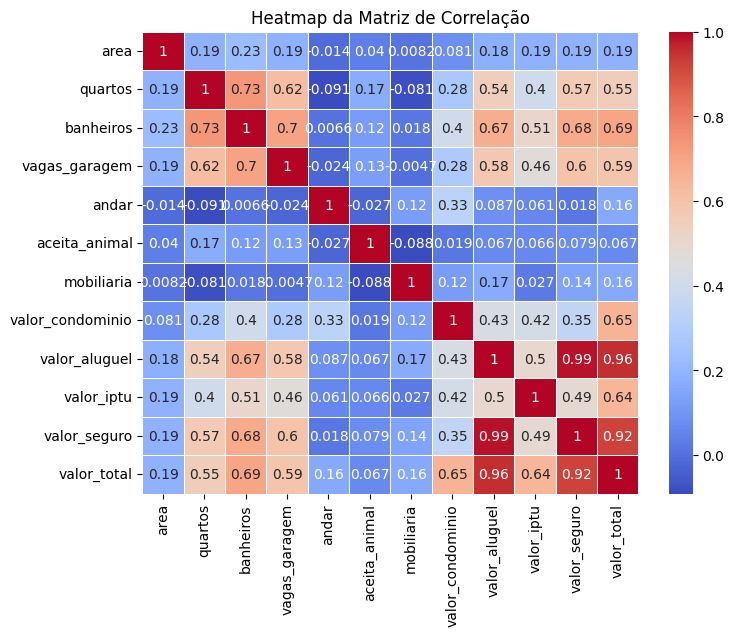

In [ ]:
#Criando a matriz de correlação
correlation_matrix = numerical_data.corr()

#Criando o heatmap com a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

#Adicionando título
plt.title('Heatmap da Matriz de Correlação')

De acordo com o gráfico de correlação, apenas o **valor do seguro** e o **IPTU** apresentam uma correlação significativa com o valor do aluguel. No entanto, é possível observar que a **área do imóvel** e o **valor do aluguel** possuem uma correlação de aproximadamente **0,1**, indicando que, à medida que a área aumenta, o valor do aluguel tende a aumentar também, embora de forma pouco expressiva.

O mesmo padrão é observado em relação ao **número de quartos** e à **mobília** do apartamento. Ambos apresentam correlação positiva com o valor do aluguel, ou seja, imóveis com mais quartos ou que são mobiliados tendem a ter valores de aluguel mais altos.

##Análise univariadas das features que iremos utilizar no modelo

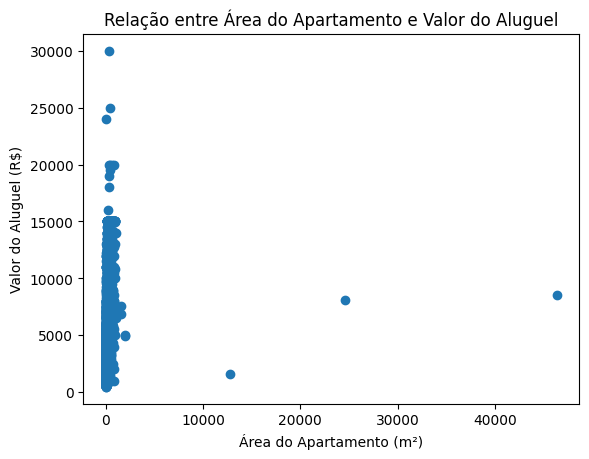

In [ ]:
#Criando gráfico de dispersão para entender a relação entre o preço do aluguel e a área

plt.scatter(df["area"], df["valor_aluguel"], marker='o')

#Adicionando título e rótulos aos eixos
plt.title('Relação entre Área do Apartamento e Valor do Aluguel')
plt.xlabel('Área do Apartamento (m²)')
plt.ylabel('Valor do Aluguel (R$)')

#Exibindo o gráfico
plt.show()

In [ ]:
#Tratando outliers

#Calculando o primeiro e terceiro quartil
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

#Definindo limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtrando os dados removendo os outliers
df = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]

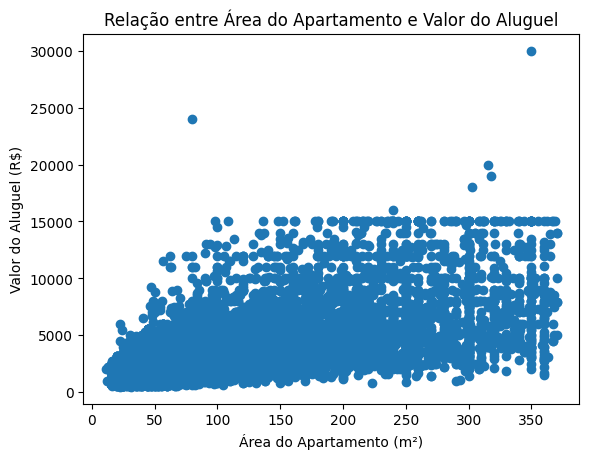

In [ ]:
#Criando o gráfico de dispersão
plt.scatter(df["area"], df["valor_aluguel"], marker='o')

plt.title('Relação entre Área do Apartamento e Valor do Aluguel')
plt.xlabel('Área do Apartamento (m²)')
plt.ylabel('Valor do Aluguel (R$)')

plt.show()

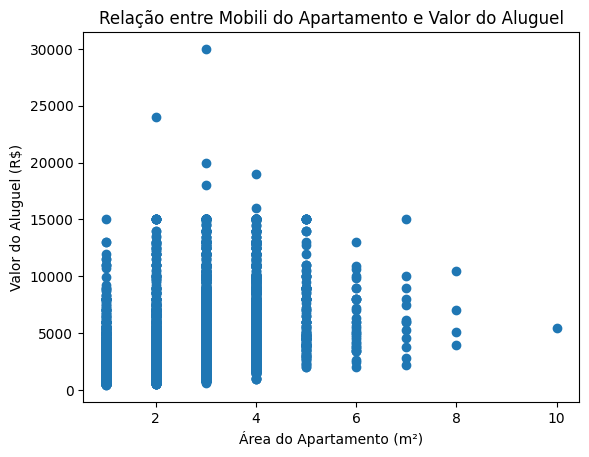

In [ ]:
plt.scatter(df["quartos"], df["valor_aluguel"], marker='o')

plt.title('Relação entre Mobili do Apartamento e Valor do Aluguel')
plt.xlabel('Área do Apartamento (m²)')
plt.ylabel('Valor do Aluguel (R$)')

plt.show()

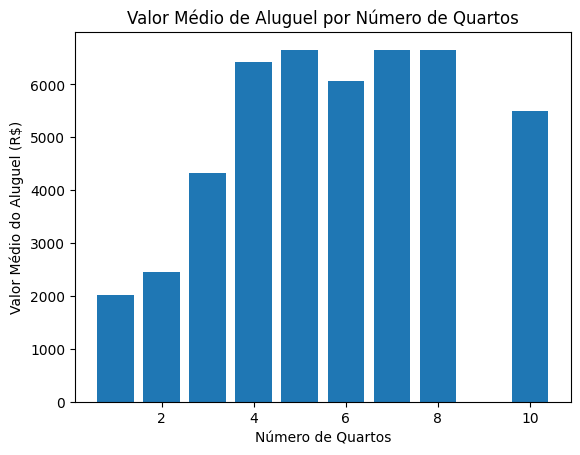

In [ ]:
#Agrupando os dados pelo número de quartos e calculando o valor médio do aluguel
df_grouped = df.groupby("quartos")["valor_aluguel"].mean().reset_index()

#Criando o gráfico de barras
plt.bar(df_grouped["quartos"], df_grouped["valor_aluguel"])

plt.title('Valor Médio de Aluguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor Médio do Aluguel (R$)')

#Exibindo o gráfico
plt.show()

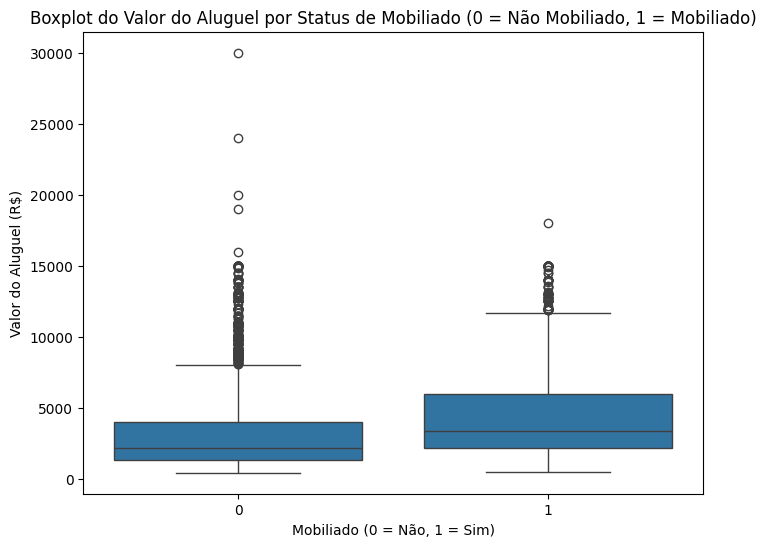

In [ ]:
#Criando um boxplot da variável 'mobiliaria' pelo 'valor_aluguel'
plt.figure(figsize=(8, 6))
sns.boxplot(x='mobiliaria', y='valor_aluguel', data=df)

plt.title('Boxplot do Valor do Aluguel por Status de Mobiliado (0 = Não Mobiliado, 1 = Mobiliado)')
plt.xlabel('Mobiliado (0 = Não, 1 = Sim)')
plt.ylabel('Valor do Aluguel (R$)')

plt.show()

O **box-plot** revela que apartamentos **mobiliados** apresentam valores medianos de aluguel mais elevados em comparação com apartamentos **não mobiliados**.

Ao analisar as informações individualmente em relação ao valor do aluguel, observa-se que nenhuma variável se mostra suficientemente relevante para explicá-lo de forma isolada. Isso evidencia a necessidade de utilizar um modelo que permita uma análise multivariada, considerando múltiplos fatores simultaneamente, para posteriormente prever o valor do aluguel de maneira mais precisa.

# **4. Validação Hold-out**

Para avaliar a performance do modelo divida o conjunto de dados em dois subconjuntos:

**Treinamento**: para ajustar os parâmetros do modelo (por exemplo, 70% dos dados).

**Teste**: para validar o modelo (os 30% restantes).

Ferramentas como **train_test_split** no **Python** podem ser usadas para isso.

In [ ]:
#Separação das variáveis (X: características preditoras, Y: alvo)
X = df[['area']] #utilizando apenas a área como preditor
Y = df['valor_aluguel'] #variável alvo: valor do aluguel

In [ ]:
#Divisão do conjunto de dados em treino e teste (80% treino, 20% teste)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

##**5. Ajuste do Modelo - Regressão Linear**
A regressão linear segue a fórmula:


**$yˆ\ = β0​+β1​⋅x$**

Onde:
y^​\: é o valor previsto (valor do aluguel).

𝑥: é a área do apartamento.

𝛽0:  é o intercepto (quando a área é zero, o valor do aluguel, como se fosse o valor médio).

𝛽1: é o coeficiente de regressão (a inclinação da reta).

No Treinamento do modelo
usa-se o conjunto de treinamento para ajustar o modelo, ou seja, encontrar os valores de
$𝛽_0$ , $𝛽_1$ que minimizam o erro quadrático entre os valores previstos e os reais.

##**Modelo 1: utilizando apenas a variável Área para calcular o Valor do Aluguel**

In [ ]:
#Criação da Função de Regressão Linear e treinamento
regressao = LinearRegression() #instanciando o modelo de regressão linear
regressao.fit(X_treino, Y_treino) #treinando o modelo com os dados de treino

LinearRegression()

##Previsões no conjunto de testes

In [ ]:
#Fazendo previsões no conjunto de teste
y_predit = regressao.predict(X_teste)

##**6. Avaliando resultados**

In [ ]:
#Avaliando o modelo - Erro Quadrático Médio e Coeficiente de Determinação (R²)
eqm = mean_squared_error(Y_teste, y_predit) #Cálculo do EQM
r2 = r2_score(Y_teste, y_predit) #Cálculo do coeficiente de determinação
mae = mean_absolute_error(Y_teste, y_predit) #Cálculo do MAE
print(f"Erro quadrático médio (primeiro modelo): {round(eqm,2)}")
print(f"Coeficiente de determinação R² (primeiro modelo): {round(r2,2)}")
print(f"Erro médio absoluto (primeiro modelo): {round(mae,2)}")

Erro quadrático médio (primeiro modelo): 5087416.82
Coeficiente de determinação R² (primeiro modelo): 0.43
Erro médio absoluto (primeiro modelo): 1525.51


### Gerando gráfico do ajuste - resultado do modelo


Para gerar o gráfico, vamos prever todos os individuos do dataset e comparar com o valor real do aluguel.

In [ ]:
y_hat = regressao.predict(X)

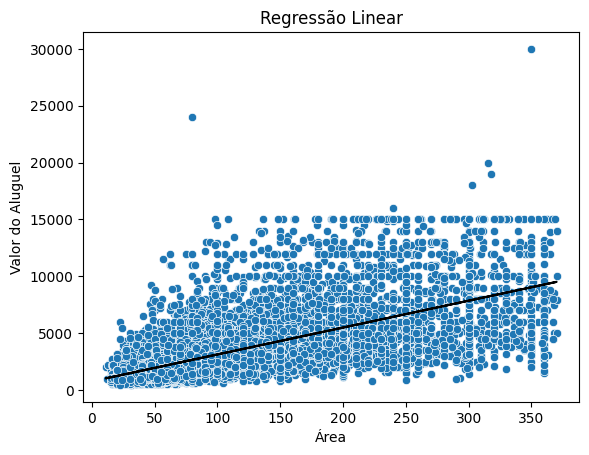

In [ ]:
#Gráfico do real x predito
sns.scatterplot(x = 'area', y = 'valor_aluguel', data = df) #Gráfico dos pontos em azul
plt.plot(X, y_hat, color = 'black')

plt.xlabel('Área')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear')
plt.show()

Apenas com a informação da área, o modelo de regressão linear não conseguiu ter uma boa previsão.

###**Modelo 2: utilizando as variáveis Área + Mobília para calcular o Valor do Aluguel**

In [ ]:
#Adicionando a variável 'mobiliaria'
X2 = df[['area', 'mobiliaria']]
X2_treino, X2_teste, Y2_treino, Y2_teste = train_test_split(X2, Y, test_size=0.2, random_state=42)
regressao2 = LinearRegression()
regressao2.fit(X2_treino, Y2_treino)
y2_predit = regressao2.predict(X2_teste)
eqm2 = mean_squared_error(Y2_teste, y2_predit)
r2_2 = r2_score(Y2_teste, y2_predit)
mae_2 = mean_absolute_error(Y_teste, y_predit)
print(f"Erro quadrático médio (segundo modelo): {eqm2}")
print(f"Coeficiente de determinação R² (segundo modelo): {r2_2}")
print(f"Erro médio absoluto (segundo modelo): {mae_2}")

Erro quadrático médio (segundo modelo): 4708209.075917175
Coeficiente de determinação R² (segundo modelo): 0.4688947471775743
Erro médio absoluto (segundo modelo): 1525.5119250823716


In [ ]:
b0 = regressao2.intercept_
b1 = regressao2.coef_[0]
b2 = regressao2.coef_[1]

In [ ]:
#Gráfico do ajuste com duas variáveis

x = df["area"]
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

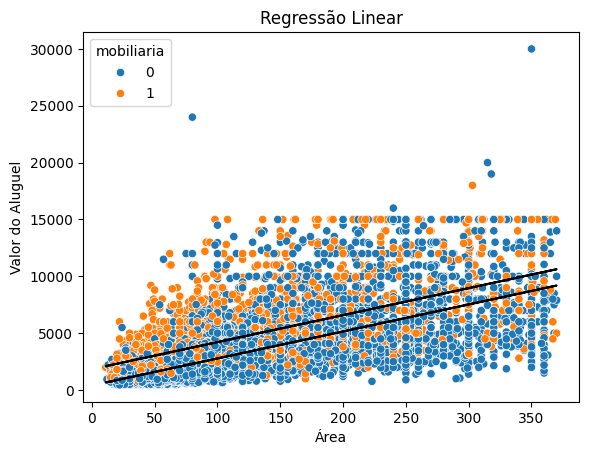

In [ ]:
#Grafico do real x predito
sns.scatterplot(x = 'area', y = 'valor_aluguel', hue = 'mobiliaria', data = df)
plt.plot(x, y0, color = 'black')
plt.plot(x, y1, color = 'black')
plt.xlabel('Área')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear')
plt.show()

###**Modelo 3: utilizando as variáveis Área + Mobília + Quartos para calcular o Valor do Aluguel**

In [ ]:
#Adicionando as variáveis 'mobiliaria' e 'quartos'
X3 = df[['area', 'mobiliaria', 'quartos']]
X3_treino, X3_teste, Y3_treino, Y3_teste = train_test_split(X3, Y, test_size=0.2, random_state=42)
regressao3 = LinearRegression()
regressao3.fit(X3_treino, Y3_treino)
y3_predit = regressao3.predict(X3_teste)
eqm3 = mean_squared_error(Y3_teste, y3_predit)
r2_3 = r2_score(Y3_teste, y3_predit)
mae_3 = mean_absolute_error(Y_teste, y_predit)
print(f"Erro quadrático médio (terceiro modelo): {eqm3}")
print(f"Coeficiente de determinação R² (terceiro modelo): {r2_3}")
print(f"Erro médio absoluto (terceiro modelo): {mae_3}")

Erro quadrático médio (terceiro modelo): 4702975.025177916
Coeficiente de determinação R² (terceiro modelo): 0.4694851695221085
Erro médio absoluto (terceiro modelo): 1525.5119250823716


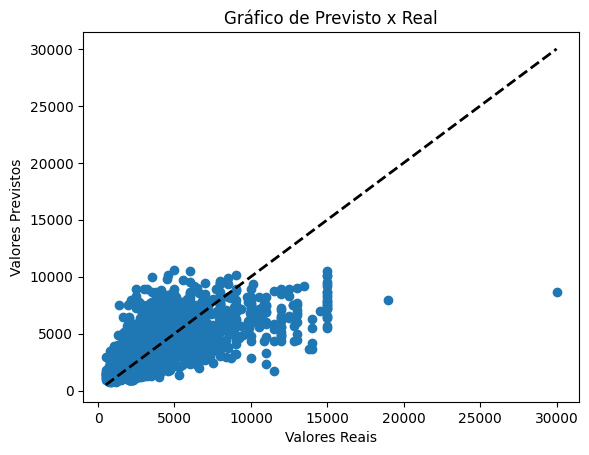

In [ ]:
#Grafico do real x predito
plt.scatter(Y3_teste, y3_predit)
plt.plot([Y3_teste.min(), Y3_teste.max()], [Y3_teste.min(), Y3_teste.max()], 'k--', lw = 2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Previsto x Real")
plt.show()

In [ ]:
#Comparando os EQM/R²/MAE de cada modelo
print(f"Erro quadrático médio do primeiro modelo: {eqm}")
print(f"Coeficiente de determinação R² do primeiro modelo: {r2}")
print(f"Erro médio absoluto do primeiro modelo: {mae}\n")

print(f"Erro quadrático médio do segundo modelo: {eqm2}")
print(f"Coeficiente de determinação R² do segundo modelo: {r2_2}")
print(f"Erro médio absoluto do segundo modelo: {mae_2}\n")

print(f"Erro quadrático médio do terceiro modelo: {eqm3}")
print(f"Coeficiente de determinação R² do terceiro modelo: {r2_3}")
print(f"Erro médio absoluto do terceiro modelo: {mae_3}")

Erro quadrático médio do primeiro modelo: 5087416.815976487
Coeficiente de determinação R² do primeiro modelo: 0.4261185621337553
Erro médio absoluto do primeiro modelo: 1525.5119250823716

Erro quadrático médio do segundo modelo: 4708209.075917175
Coeficiente de determinação R² do segundo modelo: 0.4688947471775743
Erro médio absoluto do segundo modelo: 1525.5119250823716

Erro quadrático médio do terceiro modelo: 4702975.025177916
Coeficiente de determinação R² do terceiro modelo: 0.4694851695221085
Erro médio absoluto do terceiro modelo: 1525.5119250823716


#**7. Conclusão**

**Modelo 1**: Usando apenas a área do imóvel, o EQM é alto (5087416.815976487). Isso significa que o modelo não está conseguindo prever bem o valor do aluguel.

**Modelo 2**: Com a adição da variável "mobiliaria", o EQM cai um pouco para 4708209.075917175. Apesar da melhora, o modelo ainda não explica muito bem as variações nos preços.

**Modelo 3**: Por fim, ao incluir também a variável "quartos", o EQM chega a 4702975.025177916, o que representa uma grande melhoria. Isso indica que considerar mais fatores faz com que o modelo entenda melhor o que influencia o valor do aluguel. Além disso, o modelo agora explica cerca de 46,95% (valor obtido a partir do coeficiente de determinação) das variações nos preços, ou seja, ele consegue prever melhor o valor do aluguel ao considerar mais fatores, o que representa um avanço significativo em relação aos modelos anteriores.

#**Modelo 4: Aplicando o KNN - apenas na variável 'área'**

---



In [ ]:
#Importando as bibliotecas necessárias para trabalhar o modelo
from sklearn.model_selection import GridSearchCV, cross_val_score #Para otimização de hiperparâmetros e validação cruzada
from sklearn.neighbors import KNeighborsRegressor #Para usar o modelo KNN de regressão

#O GridSearchCV realiza busca de parâmetros ideais para o modelo, testando várias combinações e avaliando o desempenho com validação cruzada.
# O cross_val_score avalia o desempenho do modelo usando validação cruzada, dividindo os dados em vários subconjuntos para obter uma avaliação mais robusta.
# O KNeighborsRegressor implementa o modelo de regressão KNN para prever valores contínuos com base nos vizinhos mais próximos.

In [ ]:
#Separação das variáveis (X: características preditoras, Y: alvo)
X4 = df[['area']] #utilizando apenas a área como preditor
Y4 = df['valor_aluguel'] #variável alvo: valor do aluguel

In [ ]:
#Divisão do conjunto de dados em treino e teste
X4_treino, X4_teste, Y4_treino, Y4_teste = train_test_split(X4, Y4, test_size=0.2, random_state=42)

In [ ]:
#Definindo o modelo base e a grade de parâmetros para busca
modelo_knn = KNeighborsRegressor()
grade_parametros = {'n_neighbors': range(1, 21)}  #Testando valores de k de 1 a 20

In [ ]:
#Configurando o GridSearchCV para encontrar o melhor k com validação cruzada
busca_em_grade = GridSearchCV(estimator=modelo_knn, param_grid=grade_parametros, cv=5, scoring='neg_mean_squared_error')
busca_em_grade.fit(X4_treino, Y4_treino)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)},
             scoring='neg_mean_squared_error')

In [ ]:
#Obtendo o melhor modelo e o melhor valor de k
melhor_modelo_knn = busca_em_grade.best_estimator_
melhor_k = busca_em_grade.best_params_['n_neighbors']
print(f"O melhor valor de k encontrado foi: {melhor_k}")

O melhor valor de k encontrado foi: 20


In [ ]:
y_hat = melhor_modelo_knn.predict(X4_teste) #validação do modelo

In [ ]:
#Métricas de desempenho do modelo otimizado
eqm_4 = mean_squared_error(Y4_teste, y_hat)
r2_4 = r2_score(Y4_teste, y_hat)
mae_4 = mean_absolute_error(Y4_teste, y_hat)
print(f"Erro quadrático médio com o melhor k: {eqm_4}")
print(f"Coeficiente de determinação R² com o melhor k: {r2_4}")
print(f"Erro médio absoluto com o melhor k: {mae_4}")

Erro quadrático médio com o melhor k: 5356138.459115078
Coeficiente de determinação R² com o melhor k: 0.39580566100368453
Erro médio absoluto com o melhor k: 1554.7211432850725


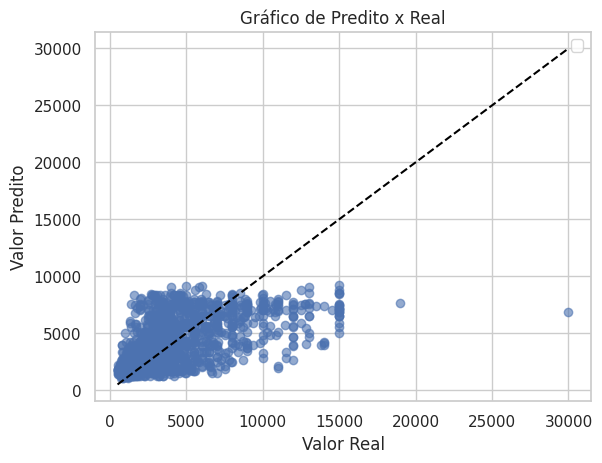

In [ ]:
#Criando o gráfico de dispersão predito x real
sns.set(style="whitegrid")
plt.scatter(Y4_teste, y_hat, alpha=0.6)
plt.plot([Y4_teste.min(), Y4_teste.max()], [Y4_teste.min(), Y4_teste.max()], color='black', linestyle='--')
plt.title('Gráfico de Predito x Real')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.legend()
plt.show()

##**Modelo 5: Adicionando a variável 'mobiliaria'**

In [ ]:
#Separação das variáveis (X: características preditoras, Y: alvo)
X5 = df[['area', 'mobiliaria']] #utilizando apenas a área como preditor
Y5 = df['valor_aluguel'] #variável alvo: valor do aluguel

In [ ]:
#Divisão do conjunto de dados em treino e teste
X5_treino, X5_teste, Y5_treino, Y5_teste = train_test_split(X5, Y5, test_size=0.2, random_state=42)

In [ ]:
#Definindo o modelo base e a grade de parâmetros para busca
modelo2_knn = KNeighborsRegressor()
grade2_parametros = {'n_neighbors': range(1, 21)}  #Testando valores de k de 1 a 20

In [ ]:
#Configurando o GridSearchCV para encontrar o melhor k com validação cruzada
busca_em_grade2 = GridSearchCV(estimator=modelo2_knn, param_grid=grade2_parametros, cv=5, scoring='neg_mean_squared_error')
busca_em_grade2.fit(X5_treino, Y5_treino)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)},
             scoring='neg_mean_squared_error')

In [ ]:
#Obtendo o melhor modelo e o melhor valor de k
melhor_modelo2_knn = busca_em_grade2.best_estimator_
melhor_k2 = busca_em_grade2.best_params_['n_neighbors']
print(f"O melhor valor de k encontrado foi: {melhor_k2}")

O melhor valor de k encontrado foi: 20


In [ ]:
y2_hat = melhor_modelo2_knn.predict(X5_teste) #validação do modelo

In [ ]:
eqm_5 = mean_squared_error(Y5_teste, y2_hat)
r2_5 = r2_score(Y5_teste, y2_hat)
mae_5 = mean_absolute_error(Y5_teste, y2_hat)
print(f"Erro quadrático médio (modelo KNN): {eqm_5}")
print(f"Coeficiente de determinação R² (modelo KNN): {r2_5}")
print(f"Erro médio absoluto (modelo KNN): {mae_5}")

Erro quadrático médio (modelo KNN): 5007082.017310284
Coeficiente de determinação R² (modelo KNN): 0.43518065620563773
Erro médio absoluto (modelo KNN): 1474.7257863205193


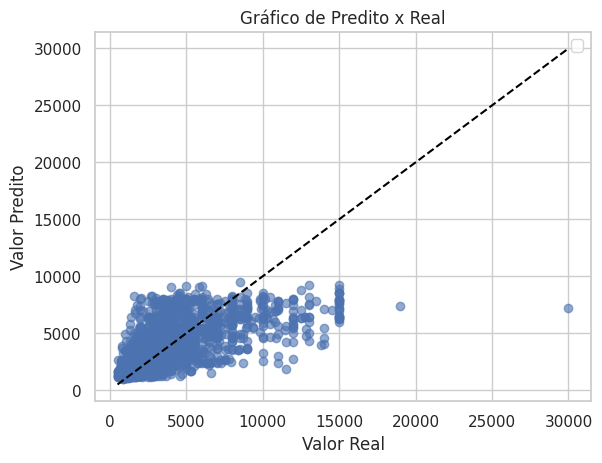

In [ ]:
#Criando o gráfico de dispersão predito x real
sns.set(style="whitegrid")
plt.scatter(Y5_teste, y2_hat, alpha=0.6)
plt.plot([Y5_teste.min(), Y5_teste.max()], [Y5_teste.min(), Y5_teste.max()], color='black', linestyle='--')
plt.title('Gráfico de Predito x Real')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.legend()
plt.show()

##**Modelo 6: Adicionando as variáveis 'mobiliaria' e 'quartos'**

In [ ]:
#Separação das variáveis (X: características preditoras, Y: alvo)
X6 = df[['area', 'mobiliaria', 'quartos']] #utilizando apenas a área como preditor
Y6 = df['valor_aluguel'] #variável alvo: valor do aluguel

In [ ]:
#Divisão do conjunto de dados em treino e teste
X6_treino, X6_teste, Y6_treino, Y6_teste = train_test_split(X6, Y6, test_size=0.2, random_state=42)

In [ ]:
#Definindo o modelo base e a grade de parâmetros para busca
modelo3_knn = KNeighborsRegressor()
grade3_parametros = {'n_neighbors': range(1, 21)}  #Testando valores de k de 1 a 20

In [ ]:
#Configurando o GridSearchCV para encontrar o melhor k com validação cruzada
busca_em_grade3 = GridSearchCV(estimator=modelo3_knn, param_grid=grade3_parametros, cv=5, scoring='neg_mean_squared_error')
busca_em_grade3.fit(X6_treino, Y6_treino)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)},
             scoring='neg_mean_squared_error')

In [ ]:
#Obtendo o melhor modelo e o melhor valor de k
melhor_modelo3_knn = busca_em_grade3.best_estimator_
melhor_k3 = busca_em_grade3.best_params_['n_neighbors']
print(f"O melhor valor de k encontrado foi: {melhor_k3}")

O melhor valor de k encontrado foi: 18


In [ ]:
y3_hat = melhor_modelo3_knn.predict(X6_teste) #validação do modelo

In [ ]:
eqm_6 = mean_squared_error(Y6_teste, y3_hat)
r2_6 = r2_score(Y6_teste, y3_hat)
mae_6 = mean_absolute_error(Y6_teste, y3_hat)
print(f"Erro quadrático médio (modelo KNN): {eqm_6}")
print(f"Coeficiente de determinação R² (modelo KNN): {r2_6}")
print(f"Erro médio absoluto (modelo KNN): {mae_6}")

Erro quadrático médio (modelo KNN): 5047030.691404251
Coeficiente de determinação R² (modelo KNN): 0.430674282271837
Erro médio absoluto (modelo KNN): 1461.7487102679315


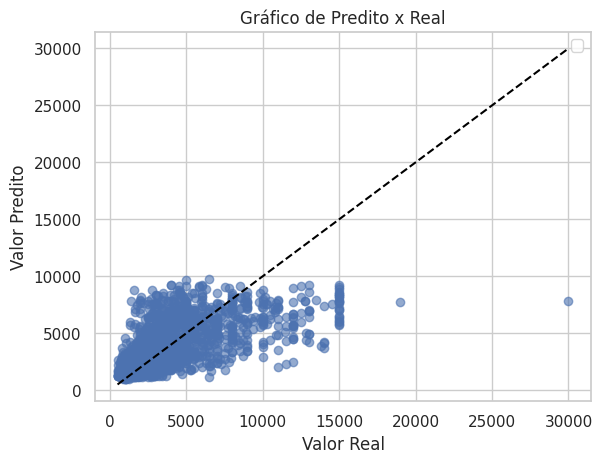

In [ ]:
#Criando o gráfico de dispersão predito x real
sns.set(style="whitegrid")
plt.scatter(Y6_teste, y3_hat, alpha=0.6)
plt.plot([Y6_teste.min(), Y6_teste.max()], [Y6_teste.min(), Y6_teste.max()], color='black', linestyle='--')
plt.title('Gráfico de Predito x Real')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.legend()
plt.show()

#**Conclusão comercial**

Ao final do treinamento dos três modelos de KNN e Regressão Linear, é possível observar que o desempenho do modelo melhora quando mais de uma variável é utilizada para prever o valor do aluguel, pois múltiplos fatores influenciam essa previsão. Entre os modelos testados, tanto no KNN quanto na Regressão Linear, o que obteve melhor desempenho foi o que utilizou as variáveis quartos, mobiliária e área.

Os resultados obtidos foram os seguintes:

**Modelo KNN**:

*   Erro Quadrático Médio (EQM): 5,047,030.69
*   Coeficiente de Determinação R²: 0.43
*   Erro Médio Absoluto (MAE): 1,461.75

**Modelo de Regressão Linear**:

*   Erro Quadrático Médio (EQM): 4,702,975.03
*   Coeficiente de Determinação R²: 0.47
*   Erro Médio Absoluto (MAE): 1,525.51

Com base nesses resultados, **o modelo de Regressão Linear teve um desempenho ligeiramente superior ao KNN**, principalmente devido ao coeficiente de determinação R², que foi mais alto, indicando que a Regressão Linear foi capaz de explicar uma maior parte da variabilidade nos dados.

Os gráficos abaixo ilustram essa comparação de forma mais visual, evidenciando a diferença no comportamento entre os modelos.

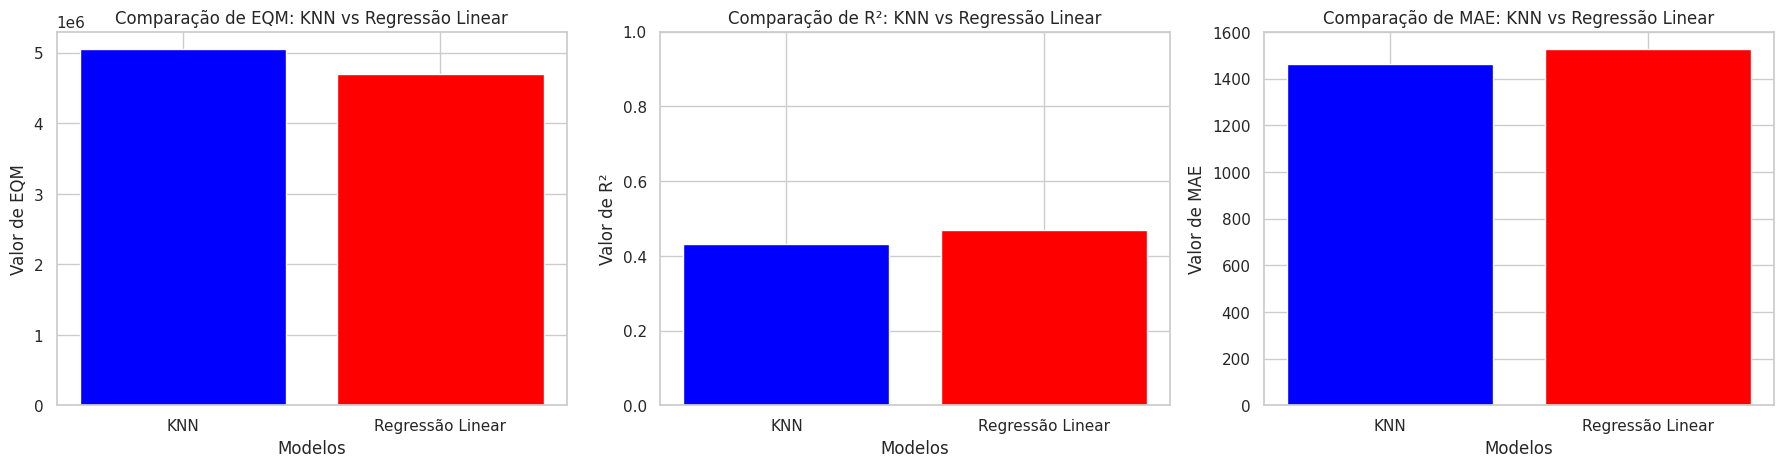

In [ ]:
#Definindo as métricas e os valores para KNN e Regressão Linear
metricas = ['KNN', 'Regressão Linear']
valores_eqm = [5047030.69, 4702975.03]  # EQM para KNN e Regressão Linear
valores_r2 = [0.4307, 0.4695]  # R² para KNN e Regressão Linear
valores_mae = [1461.75, 1525.51]  # MAE para KNN e Regressão Linear

#Criando a figura com 3 subgráficos lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#Gráfico para EQM
axs[0].bar(metricas, valores_eqm, color=['blue', 'red'])
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Valor de EQM')
axs[0].set_title('Comparação de EQM: KNN vs Regressão Linear')

#Gráfico para R²
axs[1].bar(metricas, valores_r2, color=['blue', 'red'])
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Valor de R²')
axs[1].set_title('Comparação de R²: KNN vs Regressão Linear')
axs[1].set_ylim(0, 1)  # R² varia de 0 a 1

#Gráfico para MAE
axs[2].bar(metricas, valores_mae, color=['blue', 'red'])
axs[2].set_xlabel('Modelos')
axs[2].set_ylabel('Valor de MAE')
axs[2].set_title('Comparação de MAE: KNN vs Regressão Linear')

#Ajustando o layout para evitar sobreposição
plt.tight_layout()

#Exibindo os gráficos
plt.show()

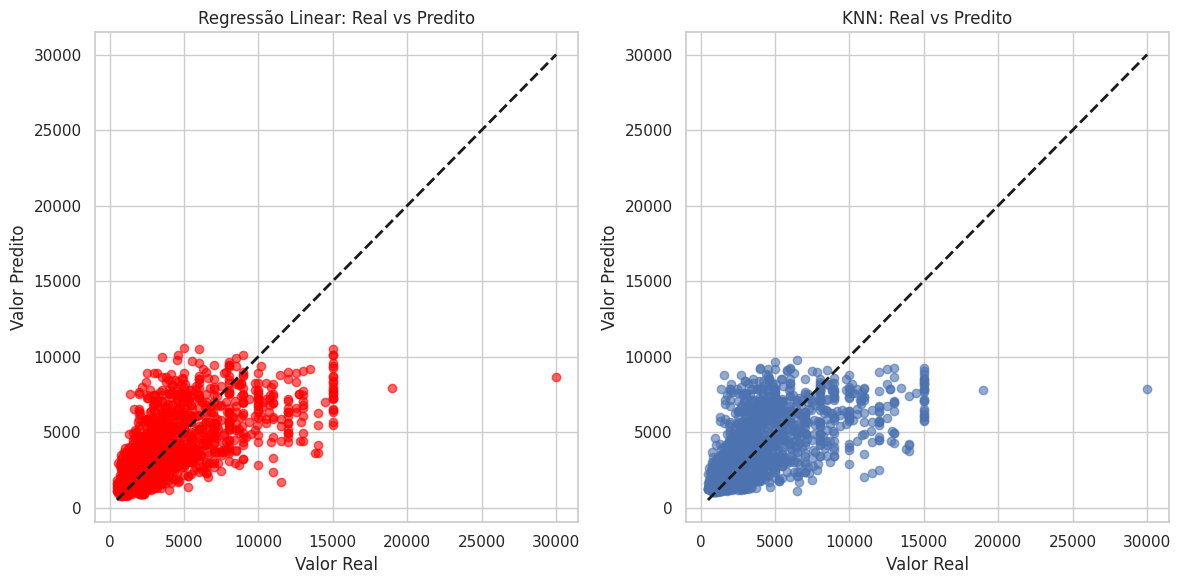

In [ ]:
#Gráfico de dispersão: Regressão Linear
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y3_teste, y3_predit, color='red', alpha=0.6)
plt.plot([Y3_teste.min(), Y3_teste.max()], [Y3_teste.min(), Y3_teste.max()], 'k--', lw=2)
plt.title('Regressão Linear: Real vs Predito')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

#Gráfico de dispersão: KNN
plt.subplot(1, 2, 2)
plt.scatter(Y6_teste, y3_hat, alpha=0.6)
plt.plot([Y6_teste.min(), Y6_teste.max()], [Y6_teste.min(), Y6_teste.max()], 'k--', lw=2)
plt.title('KNN: Real vs Predito')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

plt.tight_layout()
plt.show()

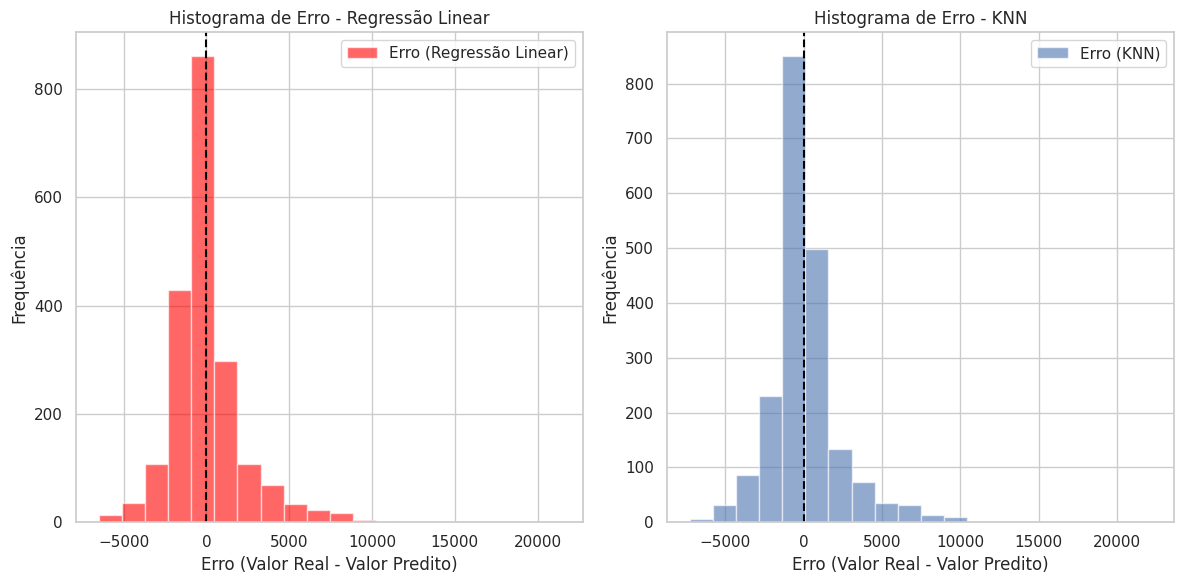

In [ ]:
#Histograma dos erros: Regressão Linear e KNN
plt.figure(figsize=(12, 6))

#Erros da Regressão Linear
plt.subplot(1, 2, 1)
plt.hist(residuos_linear, bins=20, alpha=0.6, color='red', label='Erro (Regressão Linear)')
plt.axvline(0, color='black', linestyle='--')
plt.title('Histograma de Erro - Regressão Linear')
plt.xlabel('Erro (Valor Real - Valor Predito)')
plt.ylabel('Frequência')
plt.legend()

#Erros do KNN
plt.subplot(1, 2, 2)
plt.hist(residuos_knn, bins=20, alpha=0.6, label='Erro (KNN)')
plt.axvline(0, color='black', linestyle='--')
plt.title('Histograma de Erro - KNN')
plt.xlabel('Erro (Valor Real - Valor Predito)')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

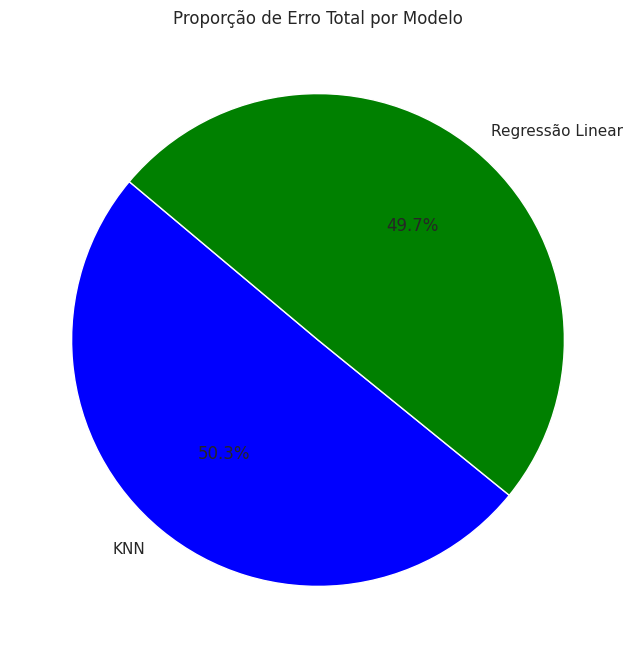

In [ ]:
#Erro total de cada modelo
erro_total_knn = np.sum(erro_abs_knn)
erro_total_linear = np.sum(erro_abs_linear)

#Gráfico de pizza
labels = ['KNN', 'Regressão Linear']
sizes = [erro_total_knn, erro_total_linear]
colors = ['blue', 'green']

#Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporção de Erro Total por Modelo')
plt.show()